<a href="https://colab.research.google.com/github/Leir-Cruz/processamento-de-imagens/blob/main/Trabalho1ProcessamentoImg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yuvio

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv
import yuvio as yuv
from math import pow

ModuleNotFoundError: No module named 'yuvio'

## Operando sobre arquivo Yuv

### Leitura da imagem

#### Função que faz leitura de yuv

In [ ]:
def read_yuv(image_path, width_resolution = 352, height_resolution = 288, jump_scale = 10):
  yuv_frame = yuv.imread(image_path, width_resolution, height_resolution,"yuv420p")
  return yuv_frame


#### Leitura da imagem

In [ ]:
yuv_frame = read_yuv("/content/foreman.yuv")
[image_y, image_u, image_v] = [yuv_frame.y, yuv_frame.u, yuv_frame.v]
yuv_frame.split()


(array([[ 10,  40, 201, ..., 212, 204, 176],
        [ 11,  39, 200, ..., 211, 207, 175],
        [ 10,  36, 205, ..., 212, 207, 175],
        ...,
        [ 15,  38, 105, ..., 169, 165, 150],
        [ 15,  33, 102, ..., 170, 166, 154],
        [ 14,  35, 103, ...,  16,  16,  16]], dtype=uint8),
 array([[128, 129, 133, ..., 116, 118, 120],
        [126, 138, 153, ..., 114, 118, 121],
        [127, 134, 152, ..., 111, 115, 121],
        ...,
        [128, 127, 124, ...,  84,  84,  89],
        [128, 127, 125, ...,  83,  83,  90],
        [129, 127, 124, ..., 105, 105, 109]], dtype=uint8),
 array([[129, 125, 114, ..., 134, 133, 133],
        [134, 102,  63, ..., 132, 133, 132],
        [132, 112,  64, ..., 130, 133, 133],
        ...,
        [128, 129, 130, ..., 160, 161, 155],
        [128, 128, 131, ..., 162, 162, 155],
        [129, 128, 131, ..., 145, 145, 141]], dtype=uint8))

array([[ 10,  40, 201, ..., 212, 204, 176],
       [ 11,  39, 200, ..., 211, 207, 175],
       [ 10,  36, 205, ..., 212, 207, 175],
       ...,
       [ 15,  38, 105, ..., 169, 165, 150],
       [ 15,  33, 102, ..., 170, 166, 154],
       [ 14,  35, 103, ...,  16,  16,  16]], dtype=uint8)
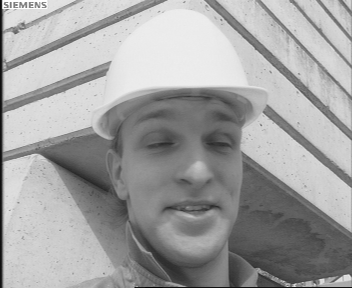

In [ ]:
image_y

array([[128, 129, 133, ..., 116, 118, 120],
       [126, 138, 153, ..., 114, 118, 121],
       [127, 134, 152, ..., 111, 115, 121],
       ...,
       [128, 127, 124, ...,  84,  84,  89],
       [128, 127, 125, ...,  83,  83,  90],
       [129, 127, 124, ..., 105, 105, 109]], dtype=uint8)
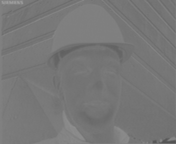

In [ ]:
image_u

array([[129, 125, 114, ..., 134, 133, 133],
       [134, 102,  63, ..., 132, 133, 132],
       [132, 112,  64, ..., 130, 133, 133],
       ...,
       [128, 129, 130, ..., 160, 161, 155],
       [128, 128, 131, ..., 162, 162, 155],
       [129, 128, 131, ..., 145, 145, 141]], dtype=uint8)
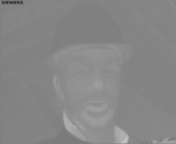

In [ ]:
image_v

### Incrementando tamanho da imagem

#### Função que incrementa tamanho da imagem com zeros

In [ ]:
def increase_image_with_zeros(yuv_image_frame):
  dimensions = yuv_image_frame.shape
  increased_image_frame = np.zeros((2 * dimensions[0], 2 * dimensions[1]), dtype="uint8")

  for i in range(0,dimensions[0]):
    for j in range(0, dimensions[1]):
      increased_image_frame[i*2][j*2] = yuv_image_frame[i][j]
  return increased_image_frame

#### Função que preenche zeros da imagem com item superior ou esquerda



In [ ]:
def fill_image_zeros(yuv_image_frame):
  dimensions = yuv_image_frame.shape
  copied_yuv_image_frame = yuv_image_frame.copy()
  for i in range(0,dimensions[0]):
    for j in range(0, dimensions[1]):
      if(not copied_yuv_image_frame[i][j]):
        if(copied_yuv_image_frame[i - 1][j]):
          copied_yuv_image_frame[i][j] = copied_yuv_image_frame[i - 1][j]
        else:
          copied_yuv_image_frame[i][j] = copied_yuv_image_frame[i][j - 1]
  return copied_yuv_image_frame

#### Função que preenche zeros da imagem com média


In [ ]:
def fill_image_zeros_with_mean(yuv_image_frame):
  #todo
  return

### Mostrando imagem RGB

In [ ]:
#### Incrementando tamanho de U e V para possuírem mesma dimensão de Y
increased_V = fill_image_zeros(increase_image_with_zeros(image_v))
increased_U = fill_image_zeros(increase_image_with_zeros(image_u))
print(increased_U)

[[128 128 129 ... 118 120 120]
 [128 128 129 ... 118 120 120]
 [126 128 138 ... 118 121 120]
 ...
 [128 128 127 ... 118  90 120]
 [129 128 127 ... 118 109 120]
 [129 128 127 ... 118 109 120]]


array([[[ 11,   9,  10],
        [ 41,  39,  40],
        [198, 202, 203],
        ...,
        [218, 213, 192],
        [210, 204, 188],
        [182, 176, 160]],

       [[ 12,  10,  11],
        [ 40,  38,  39],
        [197, 201, 202],
        ...,
        [217, 212, 191],
        [213, 207, 191],
        [181, 175, 159]],

       [[ 17,   7,   6],
        [ 37,  35,  36],
        [175, 216, 225],
        ...,
        [218, 213, 192],
        [212, 207, 193],
        [181, 175, 159]],

       ...,

       [[ 15,  15,  15],
        [ 39,  37,  38],
        [105, 105, 103],
        ...,
        [175, 170, 149],
        [196, 164,  88],
        [156, 150, 134]],

       [[ 16,  14,  17],
        [ 34,  32,  33],
        [102, 102, 100],
        ...,
        [176, 171, 150],
        [181, 166, 127],
        [160, 154, 138]],

       [[ 15,  13,  16],
        [ 36,  34,  35],
        [103, 103, 101],
        ...,
        [ 22,  17,   0],
        [ 31,  16,   0],
        [ 22,  16,   0]]], dtype=uint8)
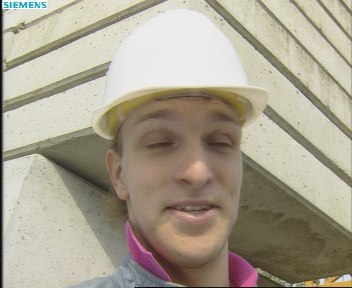

In [ ]:
yuv_frame.v = increased_V
yuv_frame.u = increased_U
yuv_frame_arr = np.dstack(yuv_frame.split())
yuv_frame_arr
im_rgb = cv.cvtColor(yuv_frame_arr, cv.COLOR_YUV2RGB)
im_rgb

## Filtros na imagem

array([[[ 61,  61,  61],
        [ 73,  73,  73],
        [ 79,  79,  79],
        ...,
        [ 98,  98,  98],
        [ 71,  71,  71],
        [  9,   9,   9]],

       [[ 57,  57,  57],
        [ 72,  72,  72],
        [ 88,  88,  88],
        ...,
        [ 94,  94,  94],
        [ 87,  87,  87],
        [ 40,  40,  40]],

       [[101, 101, 101],
        [115, 115, 115],
        [133, 133, 133],
        ...,
        [ 51,  51,  51],
        [ 27,  27,  27],
        [ 69,  69,  69]],

       ...,

       [[ 10,  10,  10],
        [ 78,  78,  78],
        [126, 126, 126],
        ...,
        [166, 166, 166],
        [168, 168, 168],
        [172, 172, 172]],

       [[  8,   8,   8],
        [ 35,  35,  35],
        [ 93,  93,  93],
        ...,
        [169, 169, 169],
        [169, 169, 169],
        [170, 170, 170]],

       [[ 11,  11,  11],
        [  4,   4,   4],
        [ 53,  53,  53],
        ...,
        [161, 161, 161],
        [161, 161, 161],
        [160, 160, 160]]], dtype=uint8)
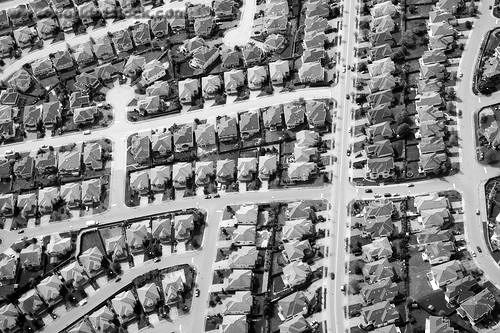

In [ ]:
image_pgm = cv.imread("/content/Image1.pgm")
image_pgm

#### Máscaras filtro Laplaciano

In [ ]:
center_8_positive = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])

center_8_negative = np.array([[1, 1, 1],
                    [1, -8, 1],
                    [1, 1, 1]])

center_4_positive = np.array([[0, -1, 0],
                    [-1, 4, -1],
                    [0, -1, 0]])

center_4_negative = np.array([[0, 1, 0],
                    [1, -4, 1],
                    [0, 1, 0]])

#### Função realiza aplicação filtro Gaussiano para suavizar imagem

In [ ]:
def smooth_image(image, dimensions, sigma = 0):
  filtered_image = cv.GaussianBlur(image, dimensions, sigma)
  return filtered_image

array([[[ 63,  63,  63],
        [ 72,  72,  72],
        [ 80,  80,  80],
        ...,
        [ 91,  91,  91],
        [ 71,  71,  71],
        [ 28,  28,  28]],

       [[ 65,  65,  65],
        [ 77,  77,  77],
        [ 91,  91,  91],
        ...,
        [ 85,  85,  85],
        [ 76,  76,  76],
        [ 48,  48,  48]],

       [[107, 107, 107],
        [118, 118, 118],
        [134, 134, 134],
        ...,
        [ 52,  52,  52],
        [ 37,  37,  37],
        [ 61,  61,  61]],

       ...,

       [[ 29,  29,  29],
        [ 77,  77,  77],
        [114, 114, 114],
        ...,
        [165, 165, 165],
        [167, 167, 167],
        [170, 170, 170]],

       [[ 14,  14,  14],
        [ 39,  39,  39],
        [ 88,  88,  88],
        ...,
        [168, 168, 168],
        [168, 168, 168],
        [169, 169, 169]],

       [[ 10,  10,  10],
        [ 16,  16,  16],
        [ 63,  63,  63],
        ...,
        [163, 163, 163],
        [163, 163, 163],
        [162, 162, 162]]], dtype=uint8)
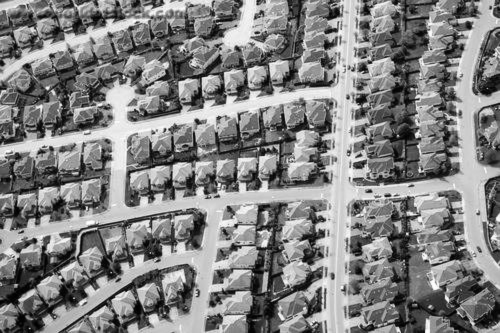

In [ ]:
smoothed_image = smooth_image(image_pgm, (3,3), 0.5)
smoothed_image

#### Função realiza aplicação filtro laplaciano para agudizar imagem e detectar bordas

In [ ]:
def sharper_image(image, kernel):
  filtered_image = cv.filter2D(src=image, ddepth=-1, kernel=kernel)
  return filtered_image

#### Laplaciano com 8 ou - 8 no centro diretamente

array([[[ 61,  61,  61],
        [ 83,  83,  83],
        [ 79,  79,  79],
        ...,
        [ 25,  25,  25],
        [ 90,  90,  90],
        [  9,   9,   9]],

       [[ 57,  57,  57],
        [ 72,  72,  72],
        [ 88,  88,  88],
        ...,
        [ 67,  67,  67],
        [ 68,  68,  68],
        [ 40,  40,  40]],

       [[101, 101, 101],
        [115, 115, 115],
        [133, 133, 133],
        ...,
        [ 51,  51,  51],
        [ 27,  27,  27],
        [245, 245, 245]],

       ...,

       [[ 10,  10,  10],
        [107, 107, 107],
        [125, 125, 125],
        ...,
        [188, 188, 188],
        [189, 189, 189],
        [222, 222, 222]],

       [[  8,   8,   8],
        [ 35,  35,  35],
        [223, 223, 223],
        ...,
        [199, 199, 199],
        [194, 194, 194],
        [202, 202, 202]],

       [[ 11,  11,  11],
        [  4,   4,   4],
        [ 53,  53,  53],
        ...,
        [161, 161, 161],
        [161, 161, 161],
        [160, 160, 160]]], dtype=uint8)
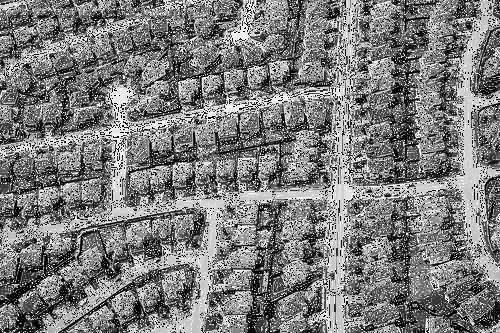

In [ ]:
sharpered_image = sharper_image(image_pgm, center_8_positive)
sharpered_image + image_pgm

array([[[121, 121, 121],
        [ 73,  73,  73],
        [112, 112, 112],
        ...,
        [ 98,  98,  98],
        [ 71,  71,  71],
        [  8,   8,   8]],

       [[ 27,  27,  27],
        [203, 203, 203],
        [178, 178, 178],
        ...,
        [ 94,  94,  94],
        [ 87,  87,  87],
        [168, 168, 168]],

       [[255, 255, 255],
        [185, 185, 185],
        [150, 150, 150],
        ...,
        [ 67,  67,  67],
        [ 26,  26,  26],
        [ 69,  69,  69]],

       ...,

       [[  9,   9,   9],
        [ 78,  78,  78],
        [126, 126, 126],
        ...,
        [166, 166, 166],
        [168, 168, 168],
        [172, 172, 172]],

       [[199, 199, 199],
        [138, 138, 138],
        [ 93,  93,  93],
        ...,
        [169, 169, 169],
        [169, 169, 169],
        [170, 170, 170]],

       [[ 87,  87,  87],
        [  3,   3,   3],
        [234, 234, 234],
        ...,
        [209, 209, 209],
        [210, 210, 210],
        [218, 218, 218]]], dtype=uint8)
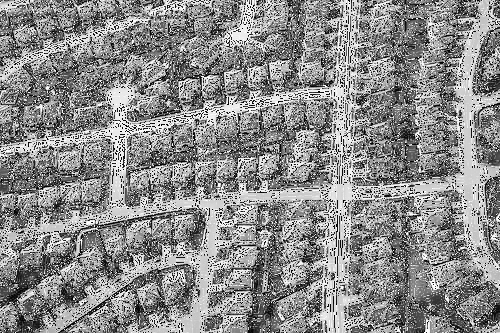

In [ ]:
sharpered_image = sharper_image(image_pgm, center_8_negative)
sharpered_image + image_pgm

####  Suavização Gaussiano de tamanho 3x3 com sigma=0,5 e depois, o filtro Laplaciano de tamanho 3x3 com +/- 4 no centro

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [55, 55, 55],
        [13, 13, 13],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [63, 63, 63],
        [63, 63, 63],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [39, 39, 39]],

       ...,

       [[ 0,  0,  0],
        [ 5,  5,  5],
        [84, 84, 84],
        ...,
        [ 6,  6,  6],
        [ 6,  6,  6],
        [13, 13, 13]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [36, 36, 36],
        ...,
        [ 8,  8,  8],
        [ 5,  5,  5],
        [ 8,  8,  8]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)
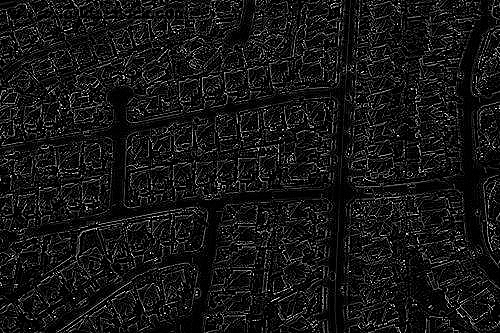

In [ ]:
smoothed_image = smooth_image(image_pgm, (3,3), 0.5)
sharpered_image = sharper_image(smoothed_image, center_4_positive)
sharpered_image

##### Somando com imagem original

array([[[ 61,  61,  61],
        [ 73,  73,  73],
        [ 79,  79,  79],
        ...,
        [153, 153, 153],
        [ 84,  84,  84],
        [  9,   9,   9]],

       [[ 57,  57,  57],
        [ 72,  72,  72],
        [ 88,  88,  88],
        ...,
        [157, 157, 157],
        [150, 150, 150],
        [ 40,  40,  40]],

       [[101, 101, 101],
        [115, 115, 115],
        [133, 133, 133],
        ...,
        [ 51,  51,  51],
        [ 27,  27,  27],
        [108, 108, 108]],

       ...,

       [[ 10,  10,  10],
        [ 83,  83,  83],
        [210, 210, 210],
        ...,
        [172, 172, 172],
        [174, 174, 174],
        [185, 185, 185]],

       [[  8,   8,   8],
        [ 35,  35,  35],
        [129, 129, 129],
        ...,
        [177, 177, 177],
        [174, 174, 174],
        [178, 178, 178]],

       [[ 11,  11,  11],
        [  4,   4,   4],
        [ 53,  53,  53],
        ...,
        [161, 161, 161],
        [161, 161, 161],
        [160, 160, 160]]], dtype=uint8)
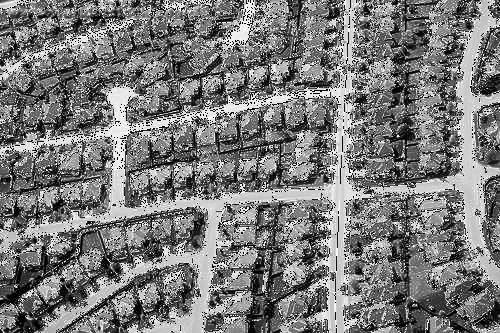

In [ ]:
image_pgm + sharpered_image

####  Suavização Gaussiano de tamanho 3x3 com sigma=1 e depois, o filtro Laplaciano de tamanho 3x3 com +/- 4 no centro

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [42, 42, 42],
        [12, 12, 12],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [22, 22, 22],
        [10, 10, 10],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [42, 42, 42],
        ...,
        [ 8,  8,  8],
        [ 6,  6,  6],
        [ 7,  7,  7]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [18, 18, 18],
        ...,
        [ 3,  3,  3],
        [ 4,  4,  4],
        [ 2,  2,  2]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)
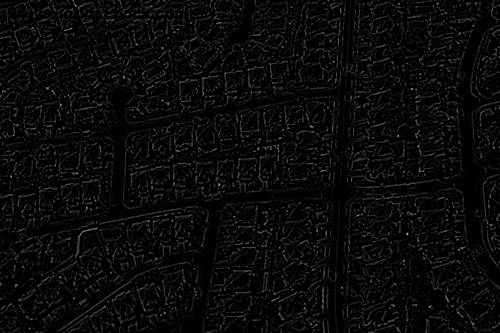

In [ ]:
smoothed_image = smooth_image(image_pgm, (3,3), 1)
sharpered_image = sharper_image(smoothed_image, center_4_positive)
sharpered_image

##### Somando com imagem original

array([[[ 61,  61,  61],
        [ 73,  73,  73],
        [ 79,  79,  79],
        ...,
        [140, 140, 140],
        [ 83,  83,  83],
        [  9,   9,   9]],

       [[ 57,  57,  57],
        [ 72,  72,  72],
        [ 88,  88,  88],
        ...,
        [116, 116, 116],
        [ 97,  97,  97],
        [ 40,  40,  40]],

       [[101, 101, 101],
        [115, 115, 115],
        [133, 133, 133],
        ...,
        [ 51,  51,  51],
        [ 27,  27,  27],
        [ 69,  69,  69]],

       ...,

       [[ 10,  10,  10],
        [ 78,  78,  78],
        [168, 168, 168],
        ...,
        [174, 174, 174],
        [174, 174, 174],
        [179, 179, 179]],

       [[  8,   8,   8],
        [ 35,  35,  35],
        [111, 111, 111],
        ...,
        [172, 172, 172],
        [173, 173, 173],
        [172, 172, 172]],

       [[ 11,  11,  11],
        [  4,   4,   4],
        [ 53,  53,  53],
        ...,
        [161, 161, 161],
        [161, 161, 161],
        [160, 160, 160]]], dtype=uint8)
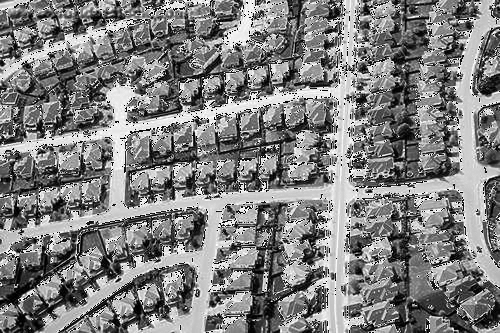

In [ ]:
image_pgm + sharpered_image

## Filtro Rejeita Notch

### Leitura da Imagem

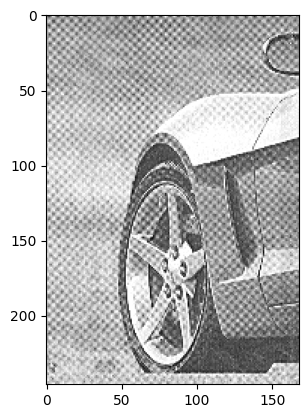

In [ ]:
image_moire = cv.imread("/content/moire.tif", 0)
plt.imshow(image_moire, cmap="gray")

#### Imagem domínio da frequência

In [ ]:
frequency_image = np.fft.fftshift(np.fft.fft2(image_moire))
frequency_image

array([[-1.73800000e+03-9.09494702e-13j, -1.28515537e+03+4.04839986e+03j,
        -8.00622386e+03-1.61713711e+03j, ...,
        -7.29624242e+02+2.32818521e+03j, -8.00622386e+03+1.61713711e+03j,
        -1.28515537e+03-4.04839986e+03j],
       [ 6.64520878e+02-1.89330469e+03j, -1.29701650e+03-9.26206517e+02j,
         4.12012819e+03-1.53808037e+03j, ...,
        -5.21526863e+03+1.26911165e+03j,  4.56899929e+02-1.88876036e+03j,
        -1.40976090e+03-4.53331529e+03j],
       [-4.16202039e+00-8.81741842e+03j,  2.87028613e+03+1.57718173e+03j,
        -6.75713831e+02-2.22178313e+03j, ...,
        -1.95034571e+03+1.36128710e+03j, -5.69724345e+03-1.68008238e+03j,
         2.60904496e+03+1.81833661e+03j],
       ...,
       [-2.68199084e+03-5.27958024e+03j, -1.19961061e+03+3.99330379e+03j,
         1.96811568e+03-2.65989133e+03j, ...,
        -6.64902034e+02-1.83552580e+03j, -1.31790777e+03+1.16176813e+03j,
         2.14941117e+03+1.87090044e+03j],
       [-4.16202039e+00+8.81741842e+03j,  2.

### Pares de notch para filtragem do padrão Moire
1° PAR: D0=10, uk=39, vk=30

2° PAR: D0=10, uk=-39, vk=30

3° PAR: D0=5, uk=78, vk=30

4° PAR: D0=5, uk=-78, vk=30

#### Função calculo filtro

In [ ]:
def calc_notch_pair_filter(image_dimensions, cutoff, u0, v0, n = 4):
  (P, Q) = image_dimensions
  filter = np.zeros(image_dimensions)
  for u in range(0, P):
    for v in range(0, Q):
      d1 = np.sqrt(pow(u - (P/2) - u0, 2) + pow(v - (Q/2) - v0, 2))
      d2 = np.sqrt(pow(u - (P/2) + u0, 2) + pow(v - (Q/2) + v0, 2))

      d1 = 1 if d1 == 0 else d1
      d2 = 1 if d2 == 0 else d2

      filter[u,v] = (1 / (1 + pow(cutoff / d1, 2*n)) ) * (1 / (1 + pow(cutoff / d2, 2*n)))
  return filter

In [ ]:
h1 = calc_notch_pair_filter(frequency_image.shape, 10, 39, 30)
h2 = calc_notch_pair_filter(frequency_image.shape, 10, -39, 30)
h3 = calc_notch_pair_filter(frequency_image.shape, 5, 78, 30)
h4 = calc_notch_pair_filter(frequency_image.shape, 5, -78, 30)

NotchFilter = np.multiply(np.multiply(h1, h2), np.multiply( h3, h4))

#### Aplicando filtro e transformando imagem domínio da frequência para dominio do espaço

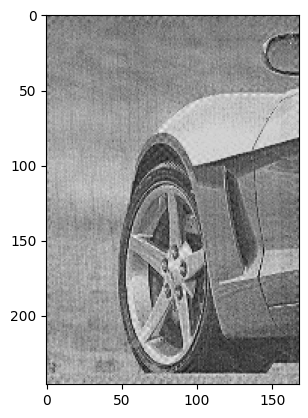

In [ ]:
NotchRejectCenter = frequency_image * NotchFilter
NotchReject = np.fft.ifftshift(NotchRejectCenter)
inverse_NotchReject = np.fft.ifft2(NotchReject)

result = np.abs(inverse_NotchReject)
plt.imshow(result, cmap="gray")